      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f       

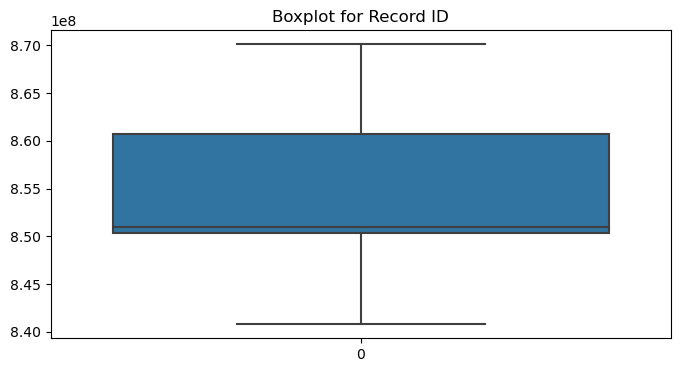

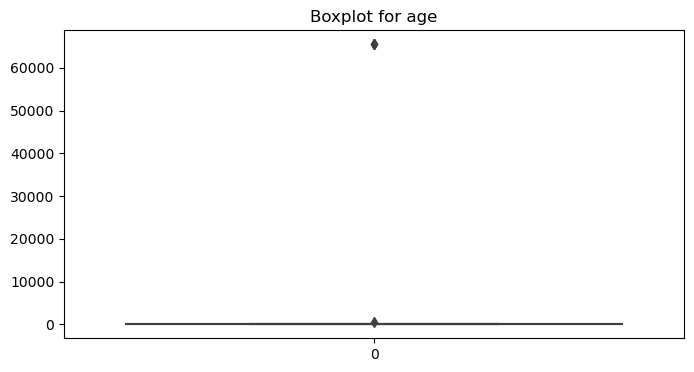

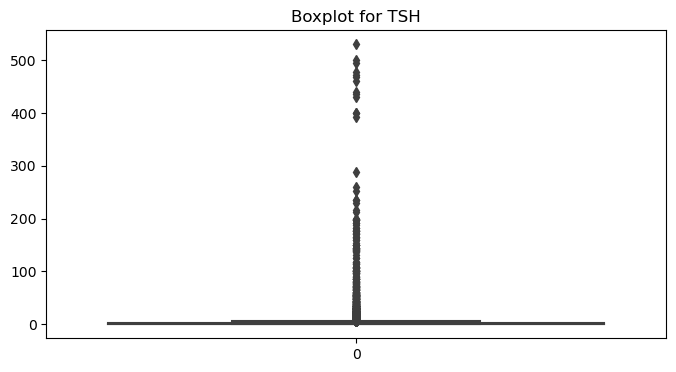

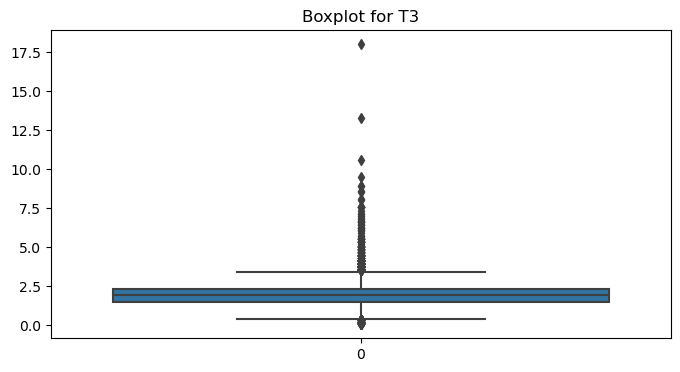

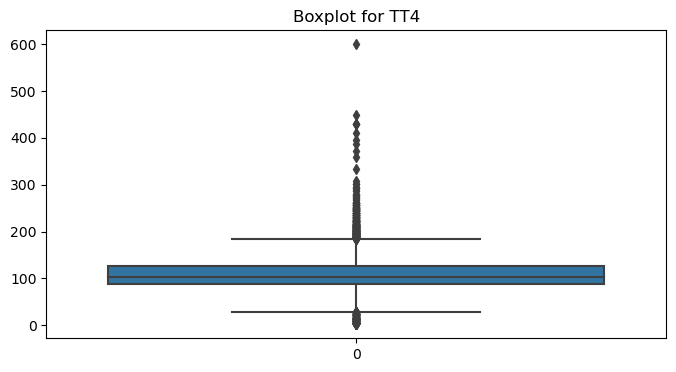

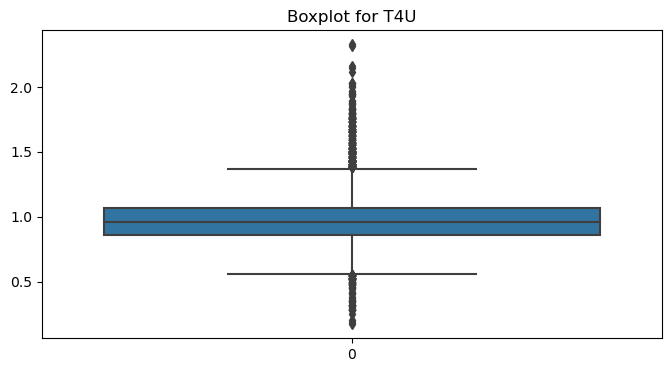

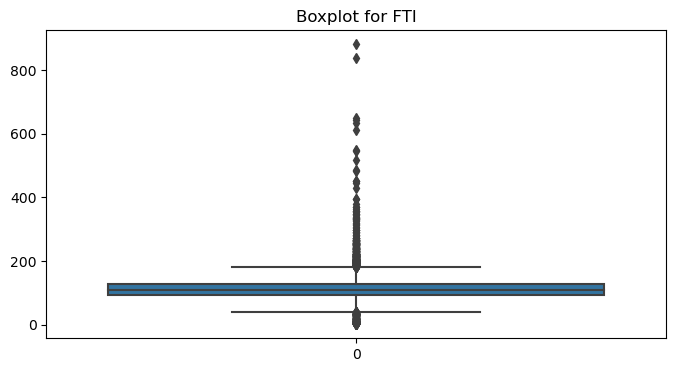

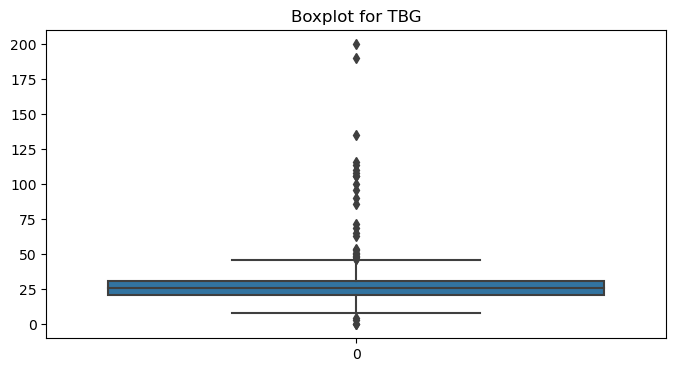

Column: Record ID
Mean: 852947346.6122983
Variance: 57486250586150.34
Standard Deviation: 7581968.780346589


Column: age
Mean: 73.55582206716092
Variance: 1401800.8688713463
Standard Deviation: 1183.9767180444667


Column: TSH
Mean: 5.218402753781513
Variance: 584.866153209295
Standard Deviation: 24.184006144749777


Column: T3
Mean: 1.970628805724726
Variance: 0.7877961683561565
Standard Deviation: 0.8875788237425206


Column: TT4
Mean: 108.70030469644902
Variance: 1407.950791475491
Standard Deviation: 37.52267036706598


Column: T4U
Mean: 0.9760557216309935
Variance: 0.04014430639006391
Standard Deviation: 0.2003604411805482


Column: FTI
Mean: 113.64074551935484
Variance: 1726.539585061158
Standard Deviation: 41.551649606979


Column: TBG
Mean: 29.87005729512894
Variance: 444.38764299946627
Standard Deviation: 21.080503860189545




In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

thy=pd.read_excel(r"C:/Users/year3/Downloads/Lab Session Data.xlsx",sheet_name='thyroid0387_UCI', na_values='?')
print(thy)

# i) Identify the data types of each attribute
print(thy.dtypes)
# ii)
for column in thy.columns:
    print(f"Column: {column}")
    print(f"Unique Values: {thy[column].unique()}")
    print("\n")

# iii)
#thyroid.describe()
numeric_columns = thy.select_dtypes(include=['float64', 'int64']).columns
print(thy[numeric_columns].describe())
#iv) Check for missing values in each column
missing_values = thy.isnull().sum()
print(missing_values)
#v)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using boxplots for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(thy[column])
    plt.title(f"Boxplot for {column}")
    plt.show()
#vi)
for column in numeric_columns:
    mean_val = thy[column].mean()
    variance_val = thy[column].var()
    std_dev_val = thy[column].std()

    print(f"Column: {column}")
    print(f"Mean: {mean_val}")
    print(f"Variance: {variance_val}")
    print(f"Standard Deviation: {std_dev_val}")
    print("\n")

In [11]:
thy['Record ID'] = thy['Record ID'].fillna(thy['Record ID'].mean())

for col in numeric_columns:
    if col == 'Record ID':
        continue
    thy[col] = thy[col].fillna(thy[col].median())


categorical_columns = thy.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(categorical_columns)
    thy[col] = thy[col].fillna(thy[col].mode()[0])

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source', 'Condition'],
      dtype='object')
Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source', 'Condition'],
      dtype='object')
Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'que

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(r"C:/Users/year3/Downloads/Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


print("Descriptive Statistics for Numeric Columns:")
print(df[numeric_columns].describe())
print("\n")


scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])


print("Z-score Normalized 'age' Column:")
print(df['age'])

Descriptive Statistics for Numeric Columns:
          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000


Z-score Normalized 'age' Column:
0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64


In [15]:
import pandas as pd
import numpy as np


file_path = r"C:/Users/year3/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


df.replace('?', np.nan, inplace=True)


binary_columns = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
    'query hypothyroid', 'query hyperthyroid', 'lithium', 
    'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured'
]


missing_cols = [col for col in binary_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns missing from DataFrame: {missing_cols}")


obs1 = df.iloc[0]
obs2 = df.iloc[1]

obs1_binary = df.loc[0, binary_columns]
obs2_binary = df.loc[1, binary_columns]


obs1_binary = obs1_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)
obs2_binary = obs2_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)


print("obs1_binary:\n", obs1_binary)
print("obs2_binary:\n", obs2_binary)

f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))


print(f"f11: {f11}, f00: {f00}, f01: {f01}, f10: {f10}")


denominator_jc = f01 + f10 + f11
jc = f11 / denominator_jc if denominator_jc != 0 else np.nan


denominator_smc = f00 + f01 + f10 + f11
smc = (f11 + f00) / denominator_smc if denominator_smc != 0 else np.nan


print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

obs1_binary:
 on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            1
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 1
Name: 0, dtype: int64
obs2_binary:
 on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 1
Name: 1, dtype: int6

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity


df = pd.read_excel(r"C:/Users/year3/Downloads/Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')


df.replace('?', np.nan, inplace=True)


print("Column names in the DataFrame:", df.columns)


df_preprocessed = df.copy()


label_encoders = {}
for column in df_preprocessed.columns:
    if df_preprocessed[column].dtype == 'object':
        le = LabelEncoder()
        df_preprocessed[column] = df_preprocessed[column].astype(str)  # Ensure data is in string format
        df_preprocessed[column] = le.fit_transform(df_preprocessed[column])
        label_encoders[column] = le


for column in df_preprocessed.select_dtypes(include=[np.number]).columns:
    df_preprocessed[column].fillna(df_preprocessed[column].mean(), inplace=True)


obs1_complete = df_preprocessed.iloc[0].values.reshape(1, -1)
obs2_complete = df_preprocessed.iloc[1].values.reshape(1, -1)


cosine_sim = cosine_similarity(obs1_complete, obs2_complete)[0][0]

print(f"Cosine Similarity: {cosine_sim}")

Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
Cosine Similarity: 0.9999999999999998


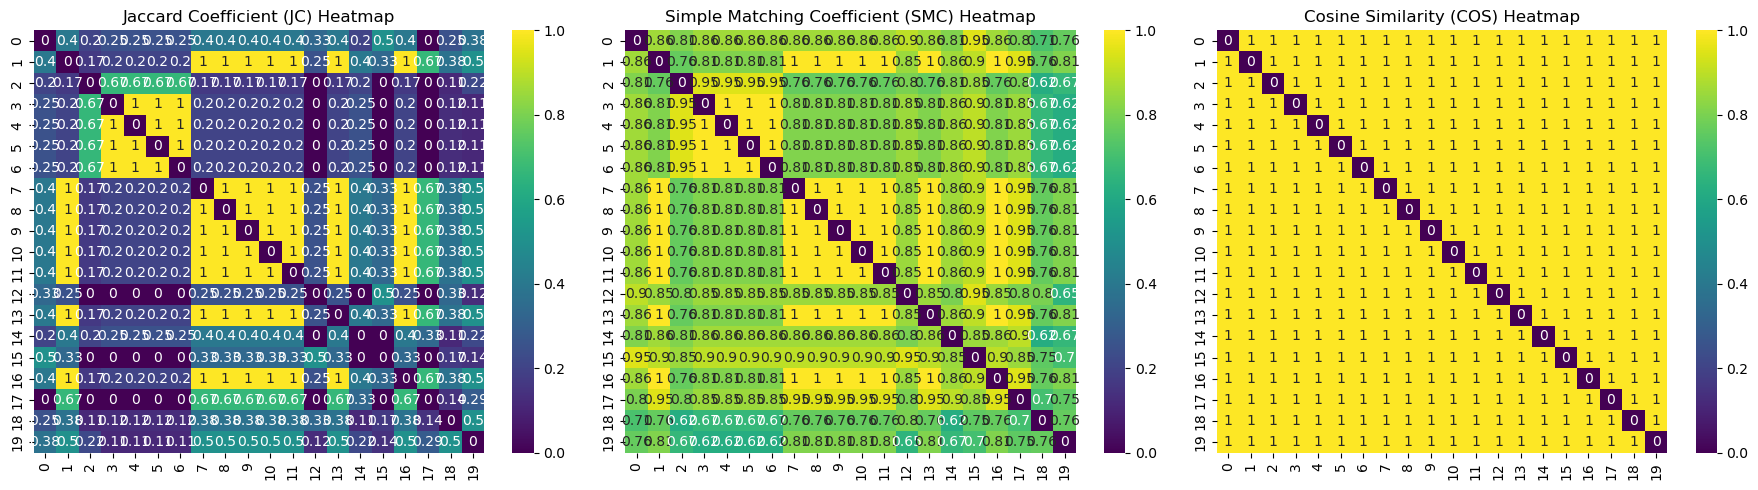

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity


file_path = r"C:/Users/year3/Downloads/Lab Session Data.xlsx"
thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


thyroid_data.replace('?', np.nan)


label_encoders_dict = {}


for cat_column in thyroid_data.select_dtypes(include=['object']).columns:
    if thyroid_data[cat_column].isnull().sum() > 0:
        thyroid_data[cat_column] = thyroid_data[cat_column].fillna(thyroid_data[cat_column].mode()[0])
    encoder = LabelEncoder()
    thyroid_data[cat_column] = encoder.fit_transform(thyroid_data[cat_column].astype(str))
    label_encoders_dict[cat_column] = encoder


for num_column in thyroid_data.select_dtypes(include=[np.number]).columns:
    thyroid_data[num_column] = thyroid_data[num_column].fillna(thyroid_data[num_column].mean())


first_20_vectors = thyroid_data.iloc[:20]

n = len(first_20_vectors)
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))


for i in range(n):
    for j in range(n):
        if i != j:
         
            vec1 = first_20_vectors.iloc[i].astype(int)
            vec2 = first_20_vectors.iloc[j].astype(int)
            
            f11 = np.sum((vec1 == 1) & (vec2 == 1))
            f00 = np.sum((vec1 == 0) & (vec2 == 0))
            f10 = np.sum((vec1 == 1) & (vec2 == 0))
            f01 = np.sum((vec1 == 0) & (vec2 == 1))
            
            jc_matrix[i, j] = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
            smc_matrix[i, j] = (f11 + f00) / (f11 + f00 + f10 + f01)
            
           
            cos_matrix[i, j] = cosine_similarity(vec1.values.reshape(1, -1), vec2.values.reshape(1, -1))[0][0]


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='viridis')
plt.title('Jaccard Coefficient (JC) Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='viridis')
plt.title('Simple Matching Coefficient (SMC) Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=True, cmap='viridis')
plt.title('Cosine Similarity (COS) Heatmap')

plt.tight_layout()
plt.show()